In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [2]:
df_all = pd.read_csv('fanfic_regression_data_curated.tsv', sep = '\t')

In [3]:
len(df_all)

609752

In [4]:
df_all['ChapterIndex'].fillna(0, inplace=True)

In [5]:
df_all['Term_novelty'].head()

0    0.887581
1    0.342318
2    0.854178
3    0.807707
4    0.790260
Name: Term_novelty, dtype: float64

In [6]:
df_all = df_all.replace([np.inf, -np.inf], np.nan)
df_all = df_all.fillna(0)
term_ave = np.average(df_all['Term_novelty'])
topic_ave = np.average(df_all['Topic_novelty'])
df_all['Term_novelty'] = df_all['Term_novelty'] - term_ave
df_all['Topic_novelty'] = df_all['Topic_novelty'] - topic_ave
df_all['Term_novelty_squared'] = np.square(df_all['Term_novelty'])
df_all['Topic_novelty_squared'] = np.square(df_all['Topic_novelty'])

In [7]:
len(df_all)

609752

In [8]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor


In [9]:
# df_all = df_all.replace([np.inf, -np.inf], np.nan)
# df_all = df_all.dropna(how = 'any')

In [10]:
# df_all = df_all[['Chapters',\
#         'Term_novelty', 'Term_novelty_squared', 'Topic_novelty', 'Topic_novelty_squared',\
#         'Freq_relationship', 'Category_F_M',\
#        'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other','Category_Unknown', \
#        'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
#        'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',\
#        'ArchiveWarnings_violence','ArchiveWarnings_noncon',\
#        'author_fic_cnt', 'Rating_G',\
#        'Rating_M', 'Rating_N', 'Rating_T',\
#        'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
#        'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
#        'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
#        'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
#        'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
#        'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
#        'Fandom_ms_paint_adventures', 'Fandom_marvel',
#        'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
#        'History']]

In [11]:
# for i in range(len(df_all.columns.values)):
#     print(df_all.columns.values[i], variance_inflation_factor(df_all.values, i))

### Logistic

In [12]:
df_all.columns.values

array(['Bookmarks', 'ChapterIndex', 'Chapters', 'Comments', 'Hits',
       'Kudos', 'Term_novelty', 'Topic_novelty', 'Freq_relationship',
       'Category_F_F', 'Category_F_M', 'Category_Gen', 'Category_M_M',
       'Category_Multi', 'Category_Other', 'Category_Unknown',
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',
       'ArchiveWarnings_violence', 'ArchiveWarnings_noncon',
       'author_fic_cnt', 'Rating_E', 'Rating_G', 'Rating_M', 'Rating_N',
       'Rating_T', 'Fandom_harry_potter', 'Fandom_dcu',
       'Fandom_doctor_who', 'Fandom_star_wars', 'Fandom_arthurian',
       'Fandom_supernatural', 'Fandom_haikyuu', 'Fandom_kuroko_no_basuke',
       'Fandom_hamilton_miranda', 'Fandom_dragon_age',
       'Fandom_the_walking_dead', 'Fandom_buffy', 'Fandom_les_miserables',
       'Fandom_naruto', 'Fandom_tolkien', 'Fandom_shakespare',
       'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adv

In [13]:
def run_logit(df, field):
    df['Intercept'] = 1.0
    df['binary'] = df[field].apply(lambda x: 1 if x != 0.0 else 0)
    logit_model = sm.Logit(df['binary'], df[['Chapters',\
        'Term_novelty', 'Term_novelty_squared', 'Topic_novelty', 'Topic_novelty_squared',\
        'Freq_relationship', 'Category_F_M',\
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other','Category_Unknown', \
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_noncon',\
       'ArchiveWarnings_violence',\
       'author_fic_cnt', 'Rating_G',\
       'Rating_M', 'Rating_N', 'Rating_T',\
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures', 'Fandom_marvel',
       'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
        'Intercept']]).fit(method='bfgs')
    pred = logit_model.predict()
    df['nonzero_prob'] = pred
    return df

### OLS

In [14]:
def run_ols(df, field):
    df = run_logit(df, field)
    df = df[df[field] != 0]
    df['Kudos'] = np.log(df['Kudos'])
    df['Hits'] = np.log(df['Hits'])
    df['Comments'] = np.log(df['Comments'])
    df['Bookmarks'] = np.log(df['Bookmarks'])
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna(how = 'any')
    model = ols( field + " ~ Term_novelty + Term_novelty_squared + Topic_novelty + Topic_novelty_squared\
 + Chapters + Freq_relationship + author_fic_cnt  \
 + Category_Gen + Category_F_M + Category_M_M + Category_Multi + Category_Other + Category_Unknown \
 + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_violence +\
 ArchiveWarnings_choose_no +\
 ArchiveWarnings_noncon + Rating_N + Rating_E + Rating_M + Rating_T\
 + Fandom_dcu + Fandom_doctor_who + Fandom_star_wars + Fandom_arthurian + \
 Fandom_supernatural + Fandom_haikyuu + Fandom_kuroko_no_basuke + Fandom_hamilton_miranda\
 + Fandom_dragon_age + Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables \
 + Fandom_naruto + Fandom_tolkien + Fandom_shakespare + Fandom_hetalia + \
 Fandom_attack_on_titan + Fandom_ms_paint_adventures +\
 Fandom_marvel + Fandom_sailor_moon + Fandom_one_direction + Fandom_sherlock \
 + nonzero_prob", data = df).fit()
    return model

### Plot coefficients

In [15]:
kudos_model = run_ols(df_all, 'Kudos')
kudos_coef = np.asarray(list(kudos_model.params)[1:-1])
kudos_err = list(kudos_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.080459
         Iterations: 35
         Function evaluations: 73
         Gradient evaluations: 69


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [16]:
ylabels =['Term novelty', 'Term novelty squared', 'Topic novelty', 'Topic novelty squared', 'Chapters', \
 'Frequent relationship',' Author work count',\
 'Category (General)','Category (Female/Male)',' Category (Male/Male) ',' Category (Multiple)','Category (Other)','Category (Unknown)\
 ','ArchiveWarnings (Underage)','ArchiveWarnings (Death)',' ArchiveWarnings (Violence)','ArchiveWarnings (Choose not to use)','\
 ArchiveWarnings (Non-consensual sex)','Rating (Not rated)', 'Rating (Explicit)','Rating (Mature)',' Rating (Teens)\
 ',' Fandom (DC) ',' Fandom (Doctor Who) ',' Fandom (Star Wars) ',' Fandom (Arthurian Mythologies)',\
  'Fandom (Supernatural)','Fandom (Haikyuu)',' Fandom (Kuroko no Basuke)',' Fandom (Hamilton (by Miranda))\
 ',' Fandom (Dragon Age)',' Fandom (The Walking Dead)',' Fandom (Buffy the Vampire Slayer)','Fandom (Les Miserables)\
 ',' Fandom (Naruto)','Fandom (Works of J.R.R.Tolkien)',' Fandom (Works of William Shakespare)','Fandom (Hetalia: Axis Powers)',' \
 Fandom (Attack on Titan)',' Fandom (MS Paint Adventures)','\
Fandom (Marvel)',' Fandom (Sailor Moon)',' Fandom (One Direction)','Fandom (Sherlock Holmes)'][::-1]

In [17]:
hits_model = run_ols(df_all, 'Hits')
hits_coef = list(hits_model.params)[1:-1]
hits_err = list(hits_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.092791
         Iterations: 35
         Function evaluations: 55
         Gradient evaluations: 51


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [18]:
comments_model = run_ols(df_all, 'Comments')
comments_coef = list(comments_model.params)[1:-1]
comments_err = list(comments_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 4


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCop

In [19]:
bookmarks_model = run_ols(df_all, 'Bookmarks')
bookmarks_coef = list(bookmarks_model.params)[1:-1]
bookmarks_err = list(bookmarks_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.420688
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 40


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCop

In [20]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


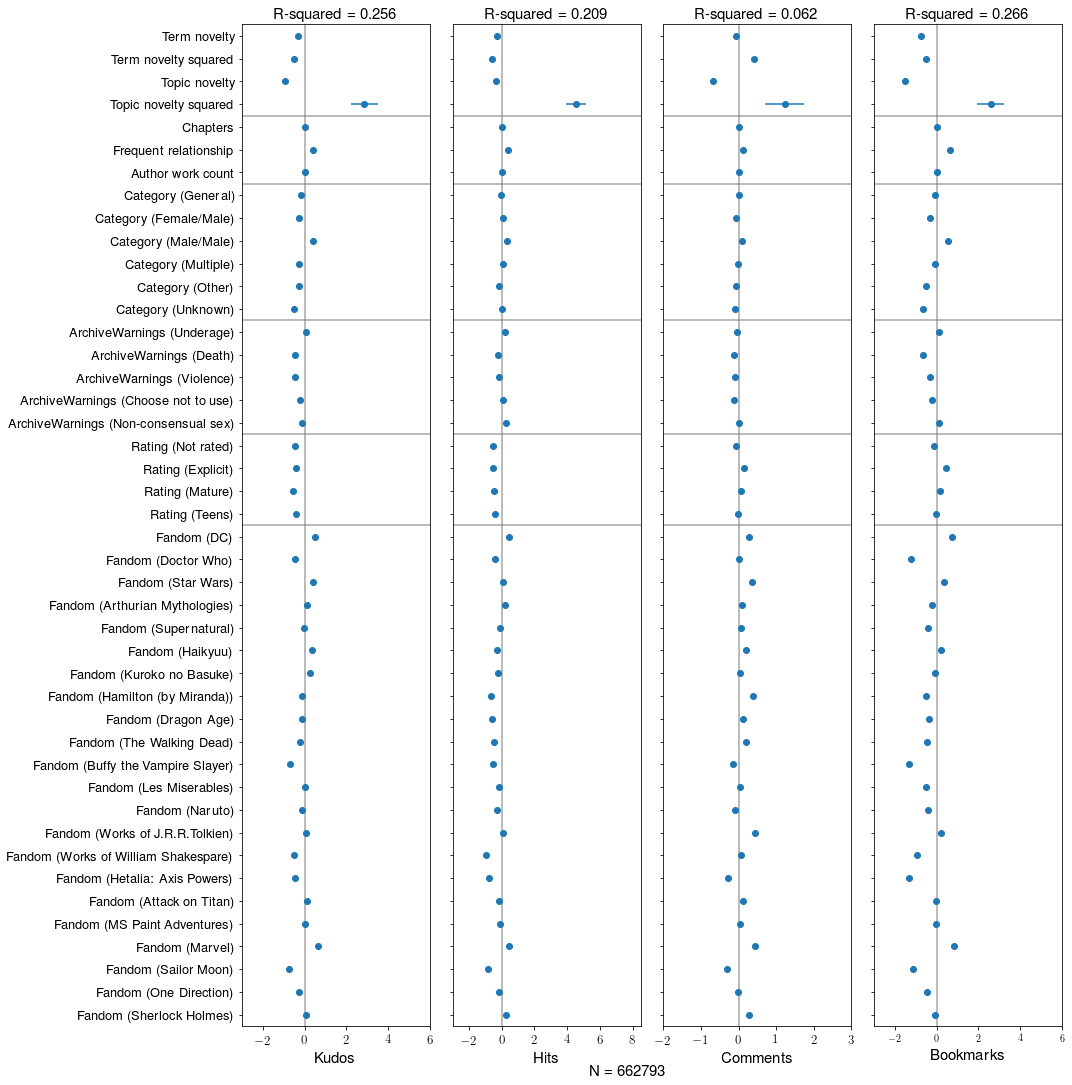

In [21]:
fig, ax = plt.subplots(1,4,figsize = (15,15))
ax[0].errorbar(kudos_coef[::-1], range(len(kudos_coef)), xerr=kudos_err[::-1] , fmt='o')

ax[0].set_yticks(range(len(kudos_coef)))
ax[0].set_yticklabels(ylabels)
ax[0].plot([0 for i in range(len(kudos_coef)+2)], range(-1,len(kudos_coef)+1), c='grey', alpha = 0.7)
ax[0].plot(range(-8,8), [21.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,8), [25.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,8), [30.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,8), [36.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[0].set_ylim(-0.5,43.5)
ax[0].set_xlim(-3,6)
ax[0].set_xlabel('Kudos', fontsize=15)
ax[0].set_title('R-squared = 0.256', fontsize=15)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
ax[1].errorbar(hits_coef[::-1], range(len(hits_err)), xerr=hits_err[::-1], fmt='o')
ax[1].set_yticks(range(len(hits_coef)))
# ax[1].set_yticklabels(ylabels)
ax[1].plot([0 for i in range(len(hits_coef)+2)], range(-1,len(hits_coef)+1), c='grey', alpha = 0.7)
ax[1].plot(range(-8,10), [21.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,10), [25.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,10), [30.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,10), [36.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,10), [39.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
ax[1].set_ylim(-0.5,43.5)
ax[1].set_xlim(-3,8.5)
ax[1].set_yticklabels([])
ax[1].set_title('R-squared = 0.209', fontsize=15)
ax[1].set_xlabel('Hits', fontsize=15)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
ax[2].errorbar(comments_coef[::-1], range(len(comments_err)), xerr=comments_err[::-1], fmt='o')
ax[2].set_yticks(range(len(comments_coef)))
ax[2].plot([0 for i in range(len(comments_coef)+2)], range(-1,len(comments_coef)+1), c='grey', alpha = 0.7)
ax[2].plot(range(-8,8), [21.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,8), [25.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,8), [30.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,8), [36.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[2].set_ylim(-0.5,43.5)
ax[2].set_xlim(-2,3)
ax[2].set_yticklabels([])
ax[2].set_title('R-squared = 0.062', fontsize=15)
ax[2].set_xlabel('Comments', fontsize=15)
for tick in ax[2].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)

ax[3].errorbar(bookmarks_coef[::-1], range(len(bookmarks_err)), xerr=bookmarks_err[::-1], fmt='o')
ax[3].set_yticks(range(len(bookmarks_coef)))
ax[3].plot([0 for i in range(len(bookmarks_coef)+2)], range(-1,len(bookmarks_coef)+1), c='grey', alpha = 0.7)
ax[3].plot(range(-8,8), [21.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,8), [25.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,8), [30.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,8), [36.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[3].set_ylim(-0.5,43.5)
ax[3].set_xlim(-3,6)
ax[3].set_yticklabels([])
ax[3].set_title('R-squared =  0.266', fontsize=15)
ax[3].set_xlabel('Bookmarks', fontsize=15)
for tick in ax[2].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
fig.text(0.55, 0.001, 'N = 662793', fontsize = 15)
plt.tight_layout()
plt.savefig('ols_coefs_full_twoparts.pdf', format='pdf')

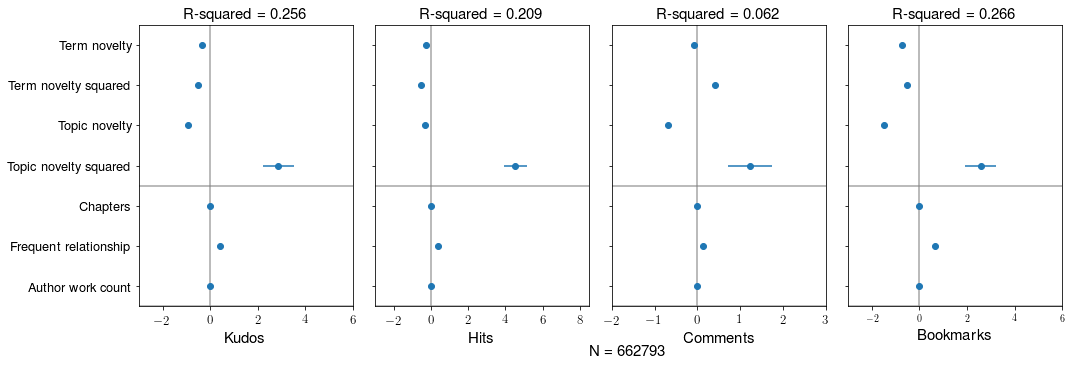

In [22]:
fig, ax = plt.subplots(1,4,figsize = (15,5))
ax[0].errorbar(kudos_coef[::-1], range(len(kudos_coef)), xerr=kudos_err[::-1] , fmt='o')

ax[0].set_yticks(range(len(kudos_coef)))
ax[0].set_yticklabels(ylabels)
ax[0].plot([0 for i in range(len(kudos_coef)+2)], range(-1,len(kudos_coef)+1), c='grey', alpha = 0.7)
ax[0].plot(range(-8,8), [21.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,8), [25.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,8), [30.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,8), [36.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[0].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[0].set_ylim(36.5,43.5)
ax[0].set_xlim(-3,6)
ax[0].set_xlabel('Kudos', fontsize=15)
ax[0].set_title('R-squared = 0.256', fontsize=15)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
ax[1].errorbar(hits_coef[::-1], range(len(hits_err)), xerr=hits_err[::-1], fmt='o')
ax[1].set_yticks(range(len(hits_coef)))
# ax[1].set_yticklabels(ylabels)
ax[1].plot([0 for i in range(len(hits_coef)+2)], range(-1,len(hits_coef)+1), c='grey', alpha = 0.7)
ax[1].plot(range(-8,10), [21.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,10), [25.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,10), [30.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,10), [36.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
ax[1].plot(range(-8,10), [39.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
ax[1].set_ylim(36.5,43.5)
ax[1].set_xlim(-3,8.5)
ax[1].set_yticklabels([])
ax[1].set_title('R-squared = 0.209', fontsize=15)
ax[1].set_xlabel('Hits', fontsize=15)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
ax[2].errorbar(comments_coef[::-1], range(len(comments_err)), xerr=comments_err[::-1], fmt='o')
ax[2].set_yticks(range(len(comments_coef)))
ax[2].plot([0 for i in range(len(comments_coef)+2)], range(-1,len(comments_coef)+1), c='grey', alpha = 0.7)
ax[2].plot(range(-8,8), [21.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,8), [25.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,8), [30.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,8), [36.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[2].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[2].set_ylim(36.5,43.5)
ax[2].set_xlim(-2,3)
ax[2].set_yticklabels([])
ax[2].set_title('R-squared = 0.062', fontsize=15)
ax[2].set_xlabel('Comments', fontsize=15)
for tick in ax[2].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)

ax[3].errorbar(bookmarks_coef[::-1], range(len(bookmarks_err)), xerr=bookmarks_err[::-1], fmt='o')
ax[3].set_yticks(range(len(bookmarks_coef)))
ax[3].plot([0 for i in range(len(bookmarks_coef)+2)], range(-1,len(bookmarks_coef)+1), c='grey', alpha = 0.7)
ax[3].plot(range(-8,8), [21.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,8), [25.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,8), [30.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,8), [36.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[3].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
ax[3].set_ylim(36.5,43.5)
ax[3].set_xlim(-3,6)
ax[3].set_yticklabels([])
ax[3].set_title('R-squared = 0.266', fontsize=15)
ax[3].set_xlabel('Bookmarks', fontsize=15)
for tick in ax[2].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
fig.text(0.55, 0.001, 'N = 662793', fontsize = 15)
plt.tight_layout()
plt.savefig('ols_coefs_partial_twoparts.pdf', format='pdf')

In [23]:
print(kudos_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Kudos   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     2268.
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:22:44   Log-Likelihood:            -4.4505e+05
No. Observations:              287139   AIC:                         8.902e+05
Df Residuals:                  287093   BIC:                         8.907e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [24]:
print(hits_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hits   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     1713.
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:22:44   Log-Likelihood:            -4.3055e+05
No. Observations:              287139   AIC:                         8.612e+05
Df Residuals:                  287093   BIC:                         8.617e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [25]:
print(comments_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Comments   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     451.7
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:22:44   Log-Likelihood:            -3.7862e+05
No. Observations:              287139   AIC:                         7.573e+05
Df Residuals:                  287094   BIC:                         7.578e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [26]:
print(bookmarks_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Bookmarks   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     2347.
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:22:44   Log-Likelihood:            -4.4460e+05
No. Observations:              287139   AIC:                         8.893e+05
Df Residuals:                  287093   BIC:                         8.898e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [27]:
fig = plt.figure(figsize=(20,20))
fig = sm.graphics.plot_regress_exog(kudos_model, "Term_novelty", fig=fig)
plt.savefig('partial_reg_plots_term_novelty.png', format='png')

/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


RuntimeError: latex was not able to process the following string:
b'Residual + Term_novelty*beta_1'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/a307/.matplotlib/tex.cache/a3405658eaf66693fc8afd96c4f9ba4c.tex
LaTeX2e <2017-04-15>
Babel <3.10> and hyphenation patterns for 84 language(s) loaded.
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2017/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2017/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/inputenc.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/utf8.def
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/local/texlive/2017/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2017/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file a3405658eaf66693fc8afd96c4f9ba4c.aux.
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(/usr/local/texlive/2017/texmf-dist/tex/latex/psnfss/ot1phv.fd)
! Missing $ inserted.
<inserted text> 
                $
l.14 ...000}{12.500000}{\sffamily Residual + Term_
                                                  novelty*beta_1}
No pages of output.
Transcript written on a3405658eaf66693fc8afd96c4f9ba4c.log.




Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11078ebf8> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'Residual + Term_novelty*beta_1'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/a307/.matplotlib/tex.cache/a3405658eaf66693fc8afd96c4f9ba4c.tex
LaTeX2e <2017-04-15>
Babel <3.10> and hyphenation patterns for 84 language(s) loaded.
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2017/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2017/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/inputenc.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/utf8.def
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/local/texlive/2017/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2017/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./a3405658eaf66693fc8afd96c4f9ba4c.aux)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(/usr/local/texlive/2017/texmf-dist/tex/latex/psnfss/ot1phv.fd)
! Missing $ inserted.
<inserted text> 
                $
l.14 ...000}{12.500000}{\sffamily Residual + Term_
                                                  novelty*beta_1}
No pages of output.
Transcript written on a3405658eaf66693fc8afd96c4f9ba4c.log.




RuntimeError: latex was not able to process the following string:
b'Residual + Term_novelty*beta_1'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/a307/.matplotlib/tex.cache/a3405658eaf66693fc8afd96c4f9ba4c.tex
LaTeX2e <2017-04-15>
Babel <3.10> and hyphenation patterns for 84 language(s) loaded.
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2017/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2017/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/textcomp.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/inputenc.sty
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/utf8.def
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/local/texlive/2017/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2017/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/local/texlive/2017/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./a3405658eaf66693fc8afd96c4f9ba4c.aux)
(/usr/local/texlive/2017/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(/usr/local/texlive/2017/texmf-dist/tex/latex/psnfss/ot1phv.fd)
! Missing $ inserted.
<inserted text> 
                $
l.14 ...000}{12.500000}{\sffamily Residual + Term_
                                                  novelty*beta_1}
No pages of output.
Transcript written on a3405658eaf66693fc8afd96c4f9ba4c.log.




<Figure size 1440x1440 with 4 Axes>